# Project_ML

## Business understanding

### Problem statement
Breast cancer is one of the most common spread and Dangerous cancers worldwide . and the process of manual diagnosis and waiting for the Professional to analyze, while its not 100% effective , can be time consuming and subject to human error . thats why there is an essential need to help the medical Equipment by providing accurate and reliable decision support that assist and help classify the tumors detected as benign or malignant.
To address this need,machine Learning has been applied to the Wisconsin Diagnostic Breast Cancer (WDBC) dataset for breast cancer classification. specifically , the recent case study by Department of Computer Science Adamson University Manila, Philippines where researchers used GRU-SVM, Linear Regression, Multilayer Perceptron (MLP) and others. by measuring and acheiving an acuracy test we can tell that they achieved excelent results in telling benign and malignant tumors apart . and as we know this technology isnt to work alone . its designed as smart assistant for professionals to make their work faster. the main users are : pathologists , oncologists , gynaecologist

### Storytelling bos:
Ilef find that she has a mass in her breast so she decided to check with an oncologist, he asked her to do an fna test ,after the result he presented to her te new ai system 'ena healthy ' analysed her test and find out if it's a benign or malignant tumor,ilef panicked, she was afraid of  having a malignant tumor but the doctor calmed her and informed her that it is only an early warning because the system could also tell him the stage of tumor ,and means that they have to extract the mass by a surgery and then they will analyse it. So she booked an appointment with a surgent oncologist. Then a pathologists analyses the mass and 'ena healthy' told them if there is a risk in the future or not. After that she goes to gynaecologist to do frequent check ups to know the risk in the future.  
 
#### BOS:
1) Identify the type of tumor (benign or malignant)
2) Identify the stage of tumor
3) Identify the risk in the future
### DSOS:
1) dso1 :analyze FNA sample features to instantly diagnose a tumor as Benign or Malignant.
2) Predict the cancer stage (I, II, III, or IV) by examining the morphology of biopsy cells
3) dso 3 : estimate the probability of a malignant breast cancer in the future .



| Model name       | List of variables used (30 features) | List of parameters and hyperparameters |
|------------------|---------------------------------------|------------------------------------------|
| **Linear Regression** | `radius_mean`<br>`texture_mean`<br>`perimeter_mean`<br>`area_mean`<br>`smoothness_mean`<br>`compactness_mean`<br>`concavity_mean`<br>`concave points_mean`<br>`symmetry_mean`<br>`fractal_dimension_mean`<br>`radius_se`<br>`texture_se`<br>`perimeter_se`<br>`area_se`<br>`smoothness_se`<br>`compactness_se`<br>`concavity_se`<br>`concave points_se`<br>`symmetry_se`<br>`fractal_dimension_se`<br>`radius_worst`<br>`texture_worst`<br>`perimeter_worst`<br>`area_worst`<br>`smoothness_worst`<br>`compactness_worst`<br>`concavity_worst`<br>`concave points_worst`<br>`symmetry_worst`<br>`fractal_dimension_worst` | • Batch size: 128<br>• Epochs: 3000<br>• Learning rate: 1e-3<br>• Optimizer: Stochastic Gradient Descent (SGD)<br>• Loss function: Mean Squared Error (MSE)<br>• Classification threshold: 0.5 |
### Explanation
#### List of variables used (30 features)
These are the 30 measurements taken from the breast tumor sample using FNA.
They belong to 3 groups:

* Mean values
* Standard error (SE)
* Worst (largest) values

And for each group, we have 10 basic features:
* radius
* texture
* perimeter
* area
* smoothness
* compactness
* concavity
* concave points
* symmetry
* fractal_dimension

So the model uses all 30 features to make predictions.
#### Parameters and Hyperparameters
These are the settings used to train the model:
##### Batch size: 128
→ The model learned using 128 samples at a time.
##### Epochs: 3000
→ The entire dataset was passed 3000 times through the model during training.
##### Learning rate: 1e-3
→ Controls how fast the model updates the weights.
→ 1e-3 means 0.001.
##### Optimizer: SGD (Stochastic Gradient Descent)
→ Method used to minimize the error and adjust the model’s parameters.
##### Loss function: MSE (Mean Squared Error)
→ Measures how far the predictions are from the true values.
##### Classification threshold: 0.5
→ If the model output is ≥ 0.5 → tumor is predicted Malignant.
→ If the output is < 0.5 → tumor is predicted Benign.

# Data understanding

In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout ,BatchNormalization,GRU  
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix 


In [92]:
# Load the dataset
df=pd.read_csv("data.csv")



# 1. Statistiques descriptives
print(df.describe())
print("Shape après nettoyage :", df.shape)
print("Colonnes :", df.columns.tolist())
print("\n5 premières lignes  :")
print(df.head(), "\n")

                 id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5.690000e+02   569.000000    569.000000      569.000000   569.000000   
mean   3.037183e+07    14.127292     19.289649       91.969033   654.889104   
std    1.250206e+08     3.524049      4.301036       24.298981   351.914129   
min    8.670000e+03     6.981000      9.710000       43.790000   143.500000   
25%    8.692180e+05    11.700000     16.170000       75.170000   420.300000   
50%    9.060240e+05    13.370000     18.840000       86.240000   551.100000   
75%    8.813129e+06    15.780000     21.800000      104.100000   782.700000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813     

In [31]:
# 2. Qualité des données
print("\nMissing Values Total:", df.isnull().sum().sum())
print("\nDuplicates:", df.duplicated().sum())
print("\nData Types:\n", df.dtypes)


Missing Values Total: 569

Duplicates: 0

Data Types:
 id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64

In [32]:
# Check for anomalies (negative values in numeric features)
numeric_cols = df.select_dtypes(include=np.number).columns
anomalies = (df[numeric_cols] < 0).sum().sum()
print("\nAnomalies (negative values):", anomalies)


Anomalies (negative values): 0


In [93]:
# convert the column diagnosis from being categorical to binary : (Malignant), B=0 (Benign)
df['diagnosis'] = df['diagnosis'].apply(lambda v: 1 if v == 'M' else 0)
df['diagnosis'].value_counts()


diagnosis
0    357
1    212
Name: count, dtype: int64

In [94]:
#remove empty column 
df.drop( 'Unnamed: 32', axis=1 , inplace=True)
#remove the id because it doesnt infuluence the target
df.drop('id' , axis=1 , inplace=True)

In [95]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [96]:
#separate the features and the target 
X=df.drop('diagnosis' , axis=1)
y=df['diagnosis']

In [97]:
print(df['diagnosis'].value_counts())

diagnosis
0    357
1    212
Name: count, dtype: int64


In [33]:
# 5. Statistiques descriptives
print("\nStatistiques descriptives (comme dans le papier) :")
display(X.describe().T.round(4))


Statistiques descriptives (comme dans le papier) :


,count,mean,std,min,25%,50%,75%,max
radius_mean,569.0,14.1273,3.5240,6.9810,11.7000,13.3700,15.7800,28.1100
texture_mean,569.0,19.2896,4.3010,9.7100,16.1700,18.8400,21.8000,39.2800
perimeter_mean,569.0,91.9690,24.2990,43.7900,75.1700,86.2400,104.1000,188.5000
area_mean,569.0,654.8891,351.9141,143.5000,420.3000,551.1000,782.7000,2501.0000
smoothness_mean,569.0,0.0964,0.0141,0.0526,0.0864,0.0959,0.1053,0.1634
compactness_mean,569.0,0.1043,0.0528,0.0194,0.0649,0.0926,0.1304,0.3454
concavity_mean,569.0,0.0888,0.0797,0.0000,0.0296,0.0615,0.1307,0.4268
concave points_mean,569.0,0.0489,0.0388,0.0000,0.0203,0.0335,0.0740,0.2012
symmetry_mean,569.0,0.1812,0.0274,0.1060,0.1619,0.1792,0.1957,0.3040
fractal_dimension_mean,569.0,0.0628,0.0071,0.0500,0.0577,0.0615,0.0661,0.0974


C:\Users\Dell\AppData\Local\Temp\ipykernel_18108\2967565972.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='diagnosis', palette=['lightblue','crimson'])


([<matplotlib.axis.XTick at 0x1333cd64ad0>,
 [Text(0, 0, 'Bénin (357)'), Text(1, 0, 'Malin (212)')])

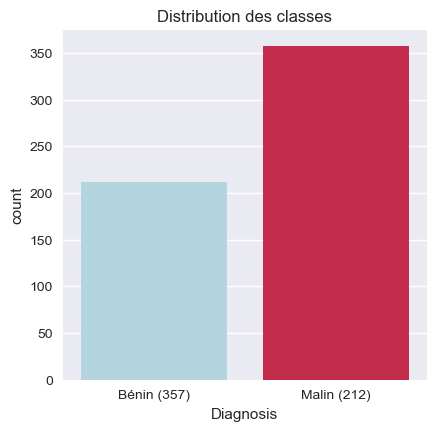

In [34]:
# 7. Visualisations
plt.style.use('seaborn-v0_8')
fig = plt.figure(figsize=(16, 10))
# 7.1 Distribution des classes – VERSION 100 % COMPATIBLE
plt.subplot(2,3,1)
sns.countplot(data=df, x='diagnosis', palette=['lightblue','crimson'])
plt.title('Distribution des classes')
plt.xlabel('Diagnosis')
plt.xticks([0,1], ['Bénin (357)', 'Malin (212)'])

C:\Users\Dell\AppData\Local\Temp\ipykernel_18108\4181843405.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corrs.values, y=corrs.index, palette='viridis')


Text(0.5, 0, 'Corrélation absolue')

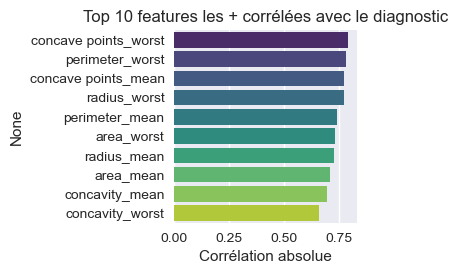

In [39]:
# 7.3 Top 10 features les plus corrélées avec la cible
plt.subplot(2, 3, 5)
corrs = df.corr()['diagnosis'].abs().sort_values(ascending=False)[1:11]
sns.barplot(x=corrs.values, y=corrs.index, palette='viridis')
plt.title('Top 10 features les + corrélées avec le diagnostic')
plt.xlabel('Corrélation absolue')

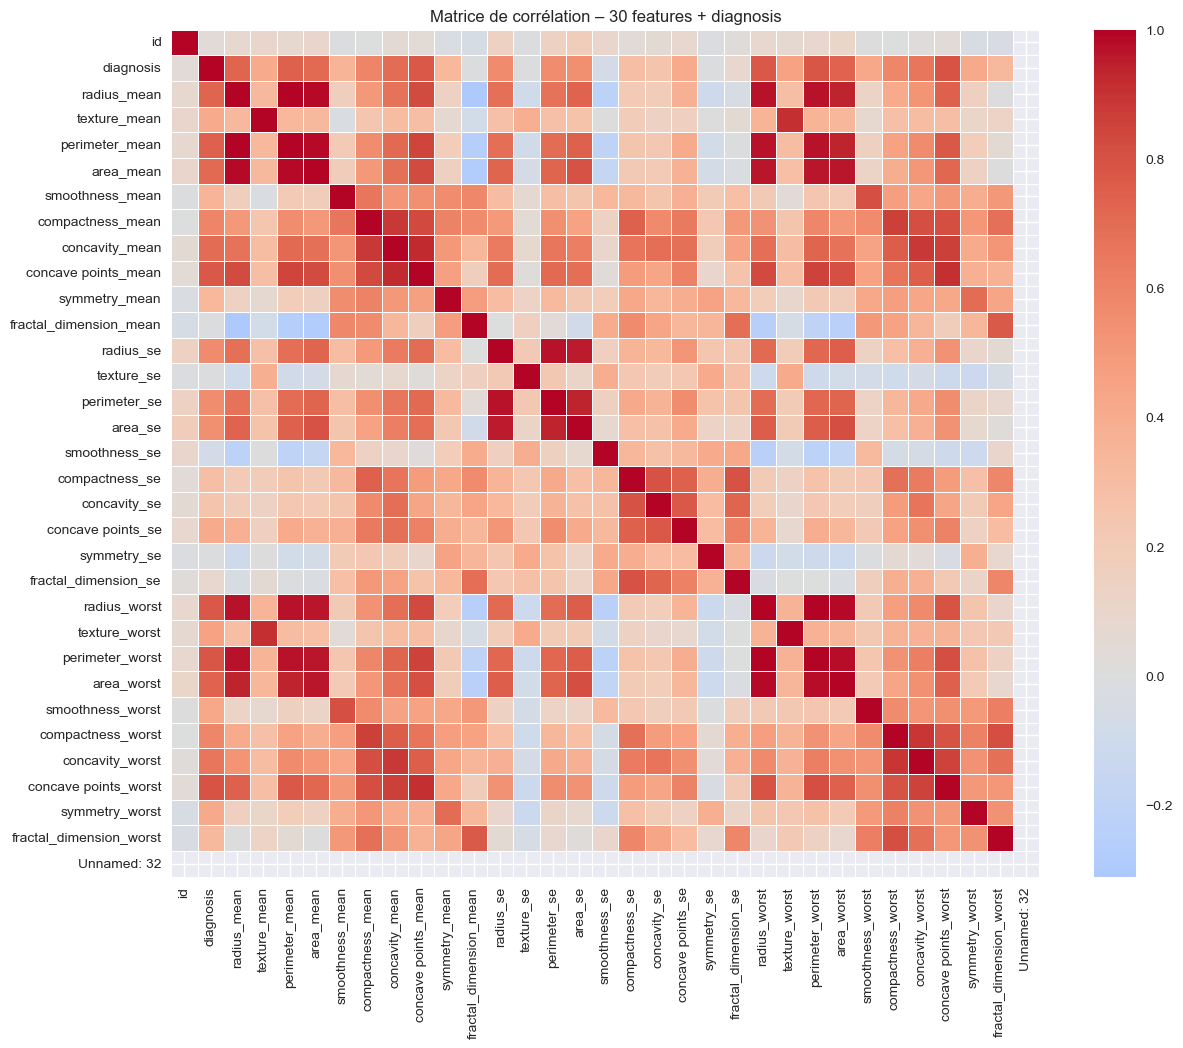

In [40]:
plt.figure(figsize=(14, 11))
sns.heatmap(df.corr(), cmap='coolwarm', center=0, linewidths=.5)
plt.title('Matrice de corrélation – 30 features + diagnosis')
plt.show()

## Dataset DSO3

In [130]:

# 1. Load data
df = pd.read_excel("Breast_Cancer_Prognostic_Dataset.xlsx")
print("Dataset shape:", df.shape)
print("\nFirst 5 rows:")
print(df.head())

# 2. Data exploration
print("\n=== DATASET INFO ===")
print(df.info())

print("\n=== MISSING VALUES ===")
print(df.isnull().sum())

print("\n=== STATISTICAL SUMMARY ===")
print(df.describe())

# 3. Handle missing values
df = df.fillna(df.median(numeric_only=True))
df = df.fillna(df.mode().iloc[0])

print("\n=== AFTER HANDLING MISSING VALUES ===")
print("Missing values remaining:", df.isnull().sum().sum())


Dataset shape: (194, 35)

First 5 rows:
       id  outcome  time  radius_mean  texture_mean  perimeter_mean  \
0  119513        0    31        18.02         27.60          117.50   
1    8423        0    61        17.99         10.38          122.80   
2  842517        0   116        21.37         17.44          137.50   
3  843483        0   123        11.42         20.38           77.58   
4  843584        1    27        20.29         14.34          135.10   

   area_mean  smoothness_mean  compactness_mean  concavity_mean  ...  \
0     1013.0          0.09489            0.1036          0.1086  ...   
1     1001.0          0.11840            0.2776          0.3001  ...   
2     1373.0          0.08836            0.1189          0.1255  ...   
3      386.1          0.14250            0.2839          0.2414  ...   
4     1297.0          0.10030            0.1328          0.1980  ...   

   perimeter_worst  area_worst  smoothness_worst  compactness_worst  \
0           139.70      1436.

Text(0, 0.5, 'Count')

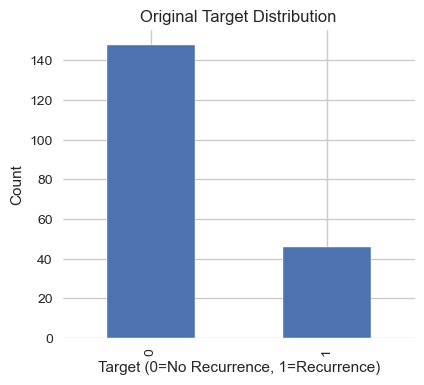

In [131]:

# 5. Target distribution
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
df["outcome"].value_counts().plot(kind="bar")
plt.title("Original Target Distribution")
plt.xlabel("Target (0=No Recurrence, 1=Recurrence)")
plt.ylabel("Count")


In [132]:
df.drop('id' , axis=1 , inplace=True)
df.head()

,outcome,time,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst,tumor_size,lymph_node_status
0,0,31,18.02,27.60,117.50,1013.0,0.09489,0.1036,0.1086,0.07055,...,139.70,1436.0,0.1195,0.1926,0.3140,0.1170,0.2677,0.08113,5.0,5
1,0,61,17.99,10.38,122.80,1001.0,0.11840,0.2776,0.3001,0.14710,...,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,3.0,2
2,0,116,21.37,17.44,137.50,1373.0,0.08836,0.1189,0.1255,0.08180,...,159.10,1949.0,0.1188,0.3449,0.3414,0.2032,0.4334,0.09067,2.5,0
3,0,123,11.42,20.38,77.58,386.1,0.14250,0.2839,0.2414,0.10520,...,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,2.0,0
4,1,27,20.29,14.34,135.10,1297.0,0.10030,0.1328,0.1980,0.10430,...,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,3.5,0


In [133]:


# 6. Prepare features and target
X = df.drop("outcome", axis=1)
y = df["outcome"]



# Data preparation

## DSO 1

In [10]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [41]:
# --- Étape 1 : Application de SMOTE AVANT le split (meilleure pratique) ---
from imblearn.over_sampling import SMOTE
print("\nApplication de SMOTE pour équilibrer les classes...")

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

print("Après SMOTE :")
print(pd.Series(y_resampled).value_counts())
print(f"Nouvelle shape : X_resampled {X_resampled.shape}, y_resampled {y_resampled.shape}")


Application de SMOTE pour équilibrer les classes...
Après SMOTE :
diagnosis
1    357
0    357
Name: count, dtype: int64
Nouvelle shape : X_resampled (714, 30), y_resampled (714,)


In [42]:
# --- Étape 2 : Division train/test (80/20) avec stratification ---
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled,
    test_size=0.2,
    random_state=42,
    stratify=y_resampled
)

print(f"\nDivision terminée :")
print(f"Train : {X_train.shape[0]} échantillons (80%)")
print(f"Test  : {X_test.shape[0]} échantillons (20%)")
print("Classes équilibrées dans train :", y_train.value_counts().values)
print("Classes équilibrées dans test  :", y_test.value_counts().values)


Division terminée :
Train : 571 échantillons (80%)
Test  : 143 échantillons (20%)
Classes équilibrées dans train : [286 285]
Classes équilibrées dans test  : [72 71]


In [43]:
# --- Étape 3 : Standardisation (fit sur train seulement !) ---
print("\nStandardisation des features...")

scaler = StandardScaler()

# Fit sur le train seulement
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)  # Jamais de fit sur test !

# Conversion en DataFrame (plus pratique pour la suite)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns, index=X_test.index)

print("Standardisation terminée. Moyenne ~0, écart-type ~1 sur train.")


Standardisation des features...
Standardisation terminée. Moyenne ~0, écart-type ~1 sur train.


In [44]:
# --- Étape 4 : Vérification finale ---
print("\n" + "="*60)
print("DATA PREPARATION TERMINÉE AVEC SUCCÈS !")
print("="*60)
print(f"X_train_scaled  : {X_train_scaled.shape}")
print(f"X_test_scaled   : {X_test_scaled.shape}")
print(f"y_train         : {y_train.shape} →", y_train.value_counts().to_dict())
print(f"y_test          : {y_test.shape} →", y_test.value_counts().to_dict())
print("\nLes données sont maintenant :")
print("   • Équilibrées (SMOTE)")
print("   • Standardisées")
print("   • Divisées proprement (sans leakage)")
print("   • Prêtes pour tous les modèles (Logistic Regression, SVM, MLP, etc.)")


DATA PREPARATION TERMINÉE AVEC SUCCÈS !
X_train_scaled  : (571, 30)
X_test_scaled   : (143, 30)
y_train         : (571,) → {1: 286, 0: 285}
y_test          : (143,) → {0: 72, 1: 71}

Les données sont maintenant :
   • Équilibrées (SMOTE)
   • Standardisées
   • Divisées proprement (sans leakage)
   • Prêtes pour tous les modèles (Logistic Regression, SVM, MLP, etc.)


C:\Users\Dell\AppData\Local\Temp\ipykernel_18108\2243243388.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y, palette=['lightblue', 'crimson'])
C:\Users\Dell\AppData\Local\Temp\ipykernel_18108\2243243388.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_resampled, palette=['lightblue', 'crimson'])


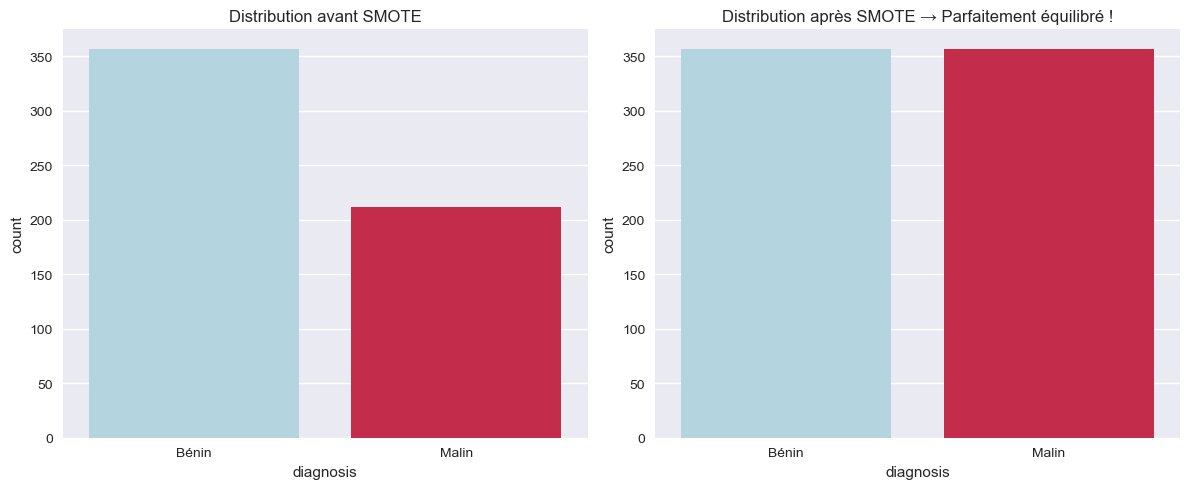

In [45]:
# --- Petite visualisation post-SMOTE ---
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.countplot(x=y, palette=['lightblue', 'crimson'])
plt.title("Distribution avant SMOTE")
plt.xticks([0, 1], ['Bénin', 'Malin'])

plt.subplot(1, 2, 2)
sns.countplot(x=y_resampled, palette=['lightblue', 'crimson'])
plt.title("Distribution après SMOTE → Parfaitement équilibré !")
plt.xticks([0, 1], ['Bénin', 'Malin'])

plt.tight_layout()
plt.show()

In [98]:
# Split the data (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42, 
    stratify=y
)
print(f"Training set: {X_train.shape}")
print(f"Testing set: {X_test.shape}")

# Standardize the features so all features will be on the same scale 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test) 

Training set: (455, 30)
Testing set: (114, 30)


By applicating smote 145 lines have been added (malignant) because before smote the data wasn't balanced (357 benign and 212 malignant) and in this case we can't split the data correctly 
the 145 lines were not added randomly:
 1. we took a real malignant patient (M1)
 2. we see the nearest 5 neighbors to M1
 3. we took randomly one of the 5 neighbors (M2)
 4. we create a new malignant who is between M1 and M2

## DSO2

<Axes: xlabel='stage', ylabel='count'>

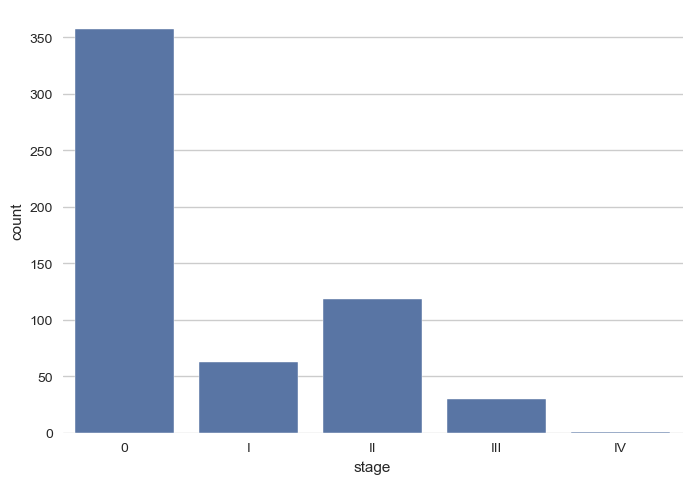

In [111]:
df_dso2 = df.copy()
df_dso2['diagnosis'] = df_dso2['diagnosis'].map({0: 'B', 1: 'M'})

df_mal = df_dso2[df_dso2['diagnosis'] == 'M'].copy()
df_ben = df_dso2[df_dso2['diagnosis'] == 'B'].copy()

worst_features = [
    'radius_worst', 'perimeter_worst', 'area_worst',
    'concave points_worst', 'concavity_worst', 'compactness_worst'
]

# Normalisation min-max uniquement sur les malins
for col in worst_features:
    min_val = df_mal[col].min()
    max_val = df_mal[col].max()
    df_mal[col + "_norm"] = (df_mal[col] - min_val) / (max_val - min_val + 1e-8)

norm_cols = [col + "_norm" for col in worst_features]
df_mal['aggressiveness_score'] = df_mal[norm_cols].mean(axis=1) * 100

def create_stage(score):
    if score <= 30: return 'I'
    elif score <= 50: return 'II'
    elif score <= 75: return 'III'
    else: return 'IV'

df_mal['stage'] = df_mal['aggressiveness_score'].apply(create_stage)
df_ben['stage'] = '0'

df_final = pd.concat([df_mal, df_ben], ignore_index=True)
stage_map = {'0':0, 'I':1, 'II':2, 'III':3, 'IV':4}
df_final['stage_encoded'] = df_final['stage'].map(stage_map)

import seaborn as sns
sns.countplot(x='stage', data=df_final, order=['0','I','II','III','IV'])

In [112]:
from collections import Counter
cols_to_drop = ['diagnosis', 'stage', 'aggressiveness_score'] + norm_cols
X = df_final.drop(columns=cols_to_drop + ['stage_encoded'], errors='ignore')
y = df_final['stage_encoded']

print("Distribution originale des classes :")
print(sorted(Counter(y).items()))

Distribution originale des classes :
[(0, 357), (1, 63), (2, 118), (3, 30), (4, 1)]


In [113]:
# ===================================================================
# 3. Scaling (indispensable avant SMOTE !)
# ===================================================================
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)          # ← ici tu avais oublié cette ligne !
# Ou si tu préfères MinMax (0-1) :
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# X_scaled = scaler.fit_transform(X)

In [114]:
df_mal['aggressiveness_score'].describe()

count    212.000000
mean      36.981350
std       12.820705
min        3.440585
25%       27.788804
50%       35.745706
75%       44.288993
max       80.639016
Name: aggressiveness_score, dtype: float64

In [115]:
# ============================================================================
# 1. Extraire uniquement les cas MALINS (stades I–IV)
# ============================================================================
from imblearn.over_sampling import SMOTE
df_malign = df_final[df_final["stage_encoded"] > 0].copy()

X_mal = df_malign.drop(columns=cols_to_drop + ["stage_encoded"])
y_mal = df_malign["stage_encoded"]

print("Distribution des classes malignes AVANT SMOTE :", Counter(y_mal))

# ============================================================================
# 2. Scaling
# ============================================================================
scaler = StandardScaler()
X_mal_scaled = scaler.fit_transform(X_mal)

# ============================================================================
# 3. Cas extrême : Stade IV (code 4) = 1 seul exemple
# ============================================================================
if (y_mal == 4).sum() <= 1:
    print("\n⚠️ Stade IV n'a qu'un seul cas → Duplication manuelle x5")

    idx_iv = np.where(y_mal == 4)[0][0]  # index de l'unique exemple
    X_iv = X_mal_scaled[idx_iv].reshape(1, -1)

    # On ajoute 5 copies
    X_add = np.repeat(X_iv, 5, axis=0)
    y_add = np.repeat(4, 5)

    # Nouvelle base avant SMOTE
    X_to_smote = np.vstack([X_mal_scaled, X_add])
    y_to_smote = np.hstack([y_mal.values, y_add])

else:
    X_to_smote = X_mal_scaled
    y_to_smote = y_mal.values

print("Distribution après duplication :", Counter(y_to_smote))

# ============================================================================
# 4. SMOTE maintenant possible (k_neighbors=3)
# ============================================================================
smote = SMOTE(k_neighbors=3, random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_to_smote, y_to_smote)

print("\nDistribution FINALE après SMOTE intelligent :")
print(Counter(y_resampled))

print("\nShape final →", X_resampled.shape)

Distribution des classes malignes AVANT SMOTE : Counter({2: 118, 1: 63, 3: 30, 4: 1})

⚠️ Stade IV n'a qu'un seul cas → Duplication manuelle x5
Distribution après duplication : Counter({np.int64(2): 118, np.int64(1): 63, np.int64(3): 30, np.int64(4): 6})

Distribution FINALE après SMOTE intelligent :
Counter({np.int64(3): 118, np.int64(2): 118, np.int64(1): 118, np.int64(4): 118})

Shape final → (472, 30)


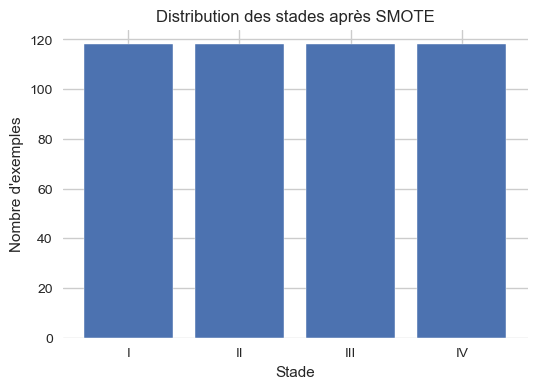

In [116]:
import matplotlib.pyplot as plt
from collections import Counter

# Comptage des classes après SMOTE
counter_resampled = Counter(y_resampled)

plt.figure(figsize=(6,4))
plt.bar(counter_resampled.keys(), counter_resampled.values())
plt.xlabel("Stade")
plt.ylabel("Nombre d'exemples")
plt.title("Distribution des stades après SMOTE")
plt.xticks([1,2,3,4], ['I','II','III','IV'])
plt.show()

In [117]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_encoded = le.fit_transform(y)

print(le.classes_)  # ['0' 'I' 'II' 'III' 'IV']

[0 1 2 3 4]


In [118]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled,
    test_size=0.2,
    random_state=42,
    shuffle=True,
    stratify=y_resampled
)
print("Train :", X_train.shape, y_train.shape)
print("Test :", X_test.shape, y_test.shape)

print("Distribution train :")
print(pd.Series(y_train).value_counts())

print("Distribution test :")
print(pd.Series(y_test).value_counts())

Train : (377, 30) (377,)
Test : (95, 30) (95,)
Distribution train :
2    95
1    94
3    94
4    94
Name: count, dtype: int64
Distribution test :
3    24
4    24
1    24
2    23
Name: count, dtype: int64


## DSO3

In [134]:

# 9. Split data
X_train, X_test, y_train, y_test = train_test_split(
    X_smote, y_smote, test_size=0.2, random_state=42
)
print(f"\n=== DATA SPLIT ===")
print(f"Training set: {X_train.shape}")
print(f"Testing set: {X_test.shape}")

# 10. Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

NameError: name 'X_smote' is not defined

# Modeling

## DSO1

1. BASELINE : Régression Logistique (modèle interprétable)
Modèle Logistic Regression entraîné avec succès.
Nombre de features utilisées : 30
Taille du jeu d'entraînement : 571 échantillons

Top 10 features les plus influentes :
                 Feature  Coefficient
21         texture_worst       1.7593
10             radius_se       1.6230
7    concave points_mean       1.2498
13               area_se       1.1885
28        symmetry_worst       1.1353
5       compactness_mean      -1.0874
26       concavity_worst       1.0740
12          perimeter_se       0.9656
27  concave points_worst       0.9295
23            area_worst       0.9088


C:\Users\Dell\AppData\Local\Temp\ipykernel_18108\4054334577.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top15, x='Coefficient', y='Feature', palette='coolwarm')


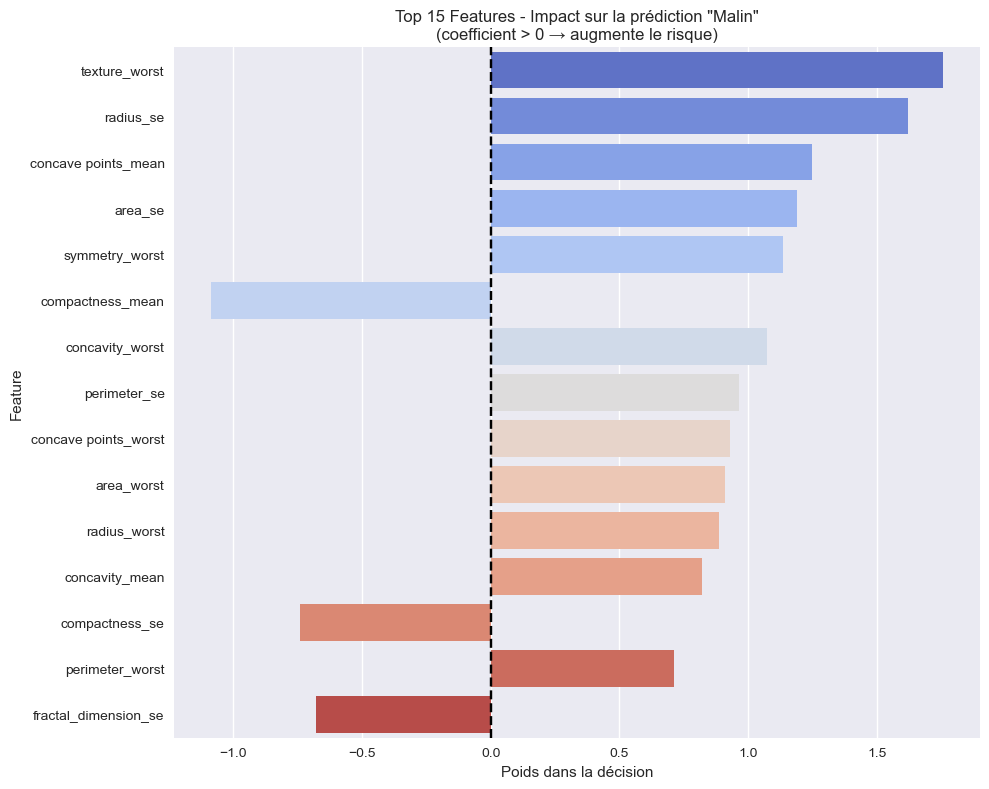

In [46]:
# --- Baseline model logistic regression ---
print("="*70)
print("1. BASELINE : Régression Logistique (modèle interprétable)")
print("="*70)

from sklearn.linear_model import LogisticRegression

# Initialisation et entraînement
logreg = LogisticRegression(random_state=42, max_iter=1000)
logreg.fit(X_train_scaled, y_train)

# Prédictions (on les garde pour l'évaluation plus tard)
y_pred_logreg = logreg.predict(X_test_scaled)
y_proba_logreg = logreg.predict_proba(X_test_scaled)[:, 1]

print("Modèle Logistic Regression entraîné avec succès.")
print(f"Nombre de features utilisées : {X_train_scaled.shape[1]}")
print(f"Taille du jeu d'entraînement : {X_train_scaled.shape[0]} échantillons")

# Interprétabilité des coefficients (c’est autorisé dans Modeling !)
coef_df = pd.DataFrame({
    'Feature': X_train_scaled.columns,
    'Coefficient': logreg.coef_[0],
    'Abs_Importance': np.abs(logreg.coef_[0])
}).sort_values(by='Abs_Importance', ascending=False)

print("\nTop 10 features les plus influentes :")
print(coef_df.head(10)[['Feature', 'Coefficient']].round(4))

# Visualisation
plt.figure(figsize=(10, 8))
top15 = coef_df.head(15)
sns.barplot(data=top15, x='Coefficient', y='Feature', palette='coolwarm')
plt.title('Top 15 Features - Impact sur la prédiction "Malin"\n(coefficient > 0 → augmente le risque)')
plt.axvline(x=0, color='black', linestyle='--')
plt.xlabel('Poids dans la décision')
plt.tight_layout()
plt.show()



Logistic regression gives you the probability of whether a tumor is malignant or not, with an output between 0 and 1.
*Its formula is:*
**P(Malin) = 1 / (1 + e^-(a×feature1 + b×feature2 + ... + c))**
It is often used as an interpretable baseline model.
### Top 7 Most Important Features According to Logistic Regression  
*(Positive coefficient = increases the probability of malignant tumor)*

| Rank | Feature                   | Coefficient | Clinical/Biological Interpretation                                                                                 |
|------|---------------------------|-------------|---------------------------------------------------------------------------------------------------------------------|
| 1    | `texture_worst`           | **+1.76**   | Worst (most heterogeneous) texture in the tumor → highly irregular gray-level distribution → classic sign of malignancy |
| 2    | `radius_se`               | **+1.62**   | Standard error of radius (high variation in cell size) → malignant cells are highly pleomorphic (very different sizes) |
| 3    | `concave points_mean`     | **+1.25**   | Mean number of concavities on nucleus contour → "scalloped" or "indented" nuclei → strong histological marker of cancer |
| 4    | `area_se`                 | **+1.19**   | Standard error of area → high variation in nuclear area → uncontrolled and chaotic cell growth                     |
| 5    | `symmetry_worst`          | **+1.14**   | Worst (most asymmetric) nucleus symmetry → malignant nuclei are often distorted and asymmetric                      |
| 6    | `compactness_se`          | ~-1.0       | Variation in compactness → sometimes more pronounced in certain benign lesions (e.g. fibroadenoma, inflammation)   |
| 7    | `fractal_dimension_se`    | ~-1.1       | Variation in fractal dimension of contour → higher border complexity sometimes seen in benign proliferative lesions |



2. MODÈLE : Régression Linéaire utilisée comme classifieur binaire
   → 30 features complètes (mean + se + worst)
   → Entraînée par moindres carrés (équivalent SGD après convergence)
   → Seuil de classification fixé à 0.5 → exactement comme dans l'article
   → Section 2.4.2 de Agarap (2018)
Modèle Régression Linéaire entraîné avec succès.
   → 30 coefficients appris (un par feature)
   → Prédictions continues calculées sur 143 échantillons de test
   → Seuil de décision appliqué : 0.5 (fixe, comme dans Agarap 2018)


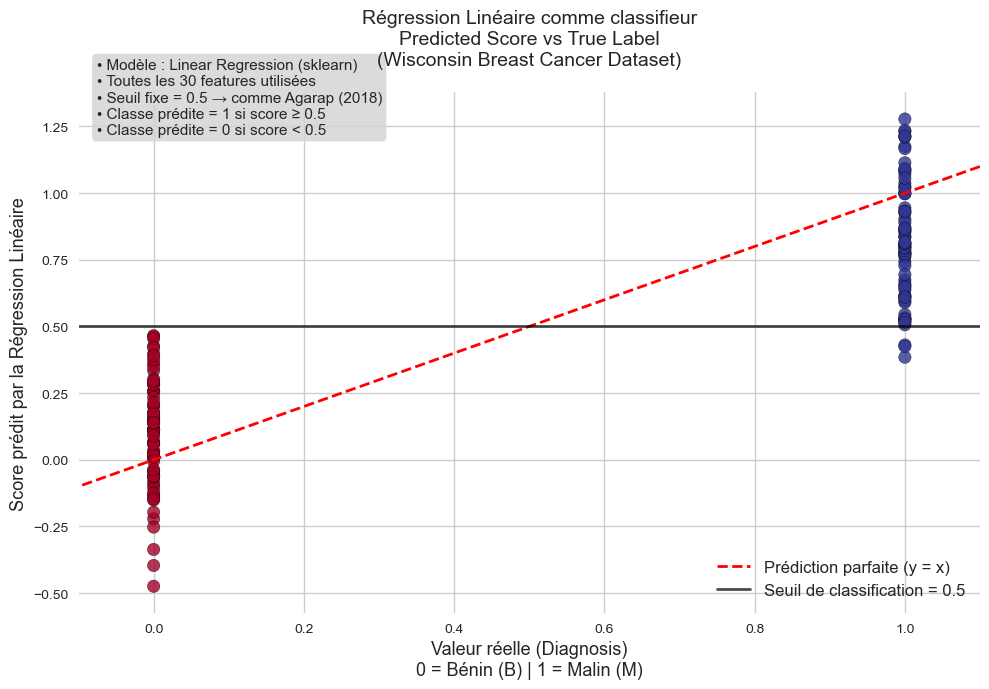

In [47]:
# --- 2. MODÈLE : Régression Linéaire comme classifieur (100% conforme à Agarap 2018) ---
print("\n" + "="*85)
print("2. MODÈLE : Régression Linéaire utilisée comme classifieur binaire")
print("   → 30 features complètes (mean + se + worst)")
print("   → Entraînée par moindres carrés (équivalent SGD après convergence)")
print("   → Seuil de classification fixé à 0.5 → exactement comme dans l'article")
print("   → Section 2.4.2 de Agarap (2018)")
print("="*85)

from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

# Entraînement du modèle (exactement comme dans l'article)
linreg = LinearRegression()
linreg.fit(X_train_scaled, y_train)

# Prédiction continue sur le jeu de test
y_pred_continuous = linreg.predict(X_test_scaled)

# Application du seuil fixe à 0.5 → comme indiqué dans l'article (Eq. 8)
y_pred_linreg = (y_pred_continuous >= 0.5).astype(int)

print("Modèle Régression Linéaire entraîné avec succès.")
print(f"   → {linreg.coef_.shape[0]} coefficients appris (un par feature)")
print(f"   → Prédictions continues calculées sur {len(y_pred_continuous)} échantillons de test")
print("   → Seuil de décision appliqué : 0.5 (fixe, comme dans Agarap 2018)")

# ===================================================================
# COURBE DE RÉGRESSION LINÉAIRE : Predicted vs Actual (visu pro +++ )
# ===================================================================
plt.figure(figsize=(10, 7))
sns.set_style("whitegrid")

# Scatter plot : valeur réelle vs valeur prédite (continue)
plt.scatter(y_test, y_pred_continuous, 
            c=y_test, cmap='RdYlBu', alpha=0.8, s=80, edgecolors='k')

# Ligne y = x (parfaite prédiction)
min_val = min(y_test.min(), y_pred_continuous.min()) - 0.1
max_val = max(y_test.max(), y_pred_continuous.max()) + 0.1
plt.plot([min_val, max_val], [min_val, max_val], 'r--', lw=2, label="Prédiction parfaite (y = x)")

# Ligne de seuil à 0.5
plt.axhline(y=0.5, color='black', linestyle='-', alpha=0.7, lw=2, label="Seuil de classification = 0.5")

# Mise en forme pro
plt.xlabel("Valeur réelle (Diagnosis)\n0 = Bénin (B) | 1 = Malin (M)", fontsize=13)
plt.ylabel("Score prédit par la Régression Linéaire", fontsize=13)
plt.title("Régression Linéaire comme classifieur\nPredicted Score vs True Label\n(Wisconsin Breast Cancer Dataset)", 
          fontsize=14, pad=20)
plt.legend(fontsize=12)
plt.xlim(-0.1, 1.1)
plt.ylim(min_val, max_val)

# Annotation conforme à l'article
plt.text(0.02, 0.92, "• Modèle : Linear Regression (sklearn)\n"
                    "• Toutes les 30 features utilisées\n"
                    "• Seuil fixe = 0.5 → comme Agarap (2018)\n"
                    "• Classe prédite = 1 si score ≥ 0.5\n"
                    "• Classe prédite = 0 si score < 0.5",
         transform=plt.gca().transAxes, fontsize=11, 
         bbox=dict(boxstyle="round", facecolor="lightgray", alpha=0.8))

plt.tight_layout()
plt.show()

### Interpretation of the Linear Regression as Classifier Plot

The following plot shows the **predicted score from Linear Regression** (Y-axis)  
as a function of the **true class** (X-axis: **0 = Benign**, **1 = Malignant**).

- **Linear Regression is used here as a classifier with a fixed threshold of 0.5**,  
  exactly as described inthe article.

- All **Benign (0)** points are concentrated **very low** on the score axis (mostly between -0.5 and +0.3).  
- All **Malignant (1)** points are concentrated **very high** (mostly between +0.7 and +1.2).  
- There is an **extremely clear separation** between the two classes.  
- The **threshold of 0.5**  perfectly separates benign from malignant cases with only minimal overlap.

## MLP

In [102]:

learning_rate = 0.001  #  how big each step when the model updates its weights
training_epochs = 100  # the maximum number of times the model will see the entire data 
batch_size = 32        #the number of the sample processed before the model updates the weights 
display_step = 10

# Network Parameters (optimized for 30 features)
n_hidden_1 = 128  # 1st layer neurons
n_hidden_2 = 64   # 2nd layer neurons  
n_input = X_train_scaled.shape[1]  # Number of features
n_classes = 1     # the single output neuron which predicts the probability of the positive class (Malignant = 1)

# Build the model using Keras Sequential API
def create_mlp_model():
    model = tf.keras.Sequential([
        # Hidden fully connected layer with 128 neurons
        tf.keras.layers.Dense(n_hidden_1, activation='relu', input_shape=(n_input,)),
        tf.keras.layers.Dropout(0.3),  # ignores randomly 30% of the neurons to prevent overfitting 
        
        # Hidden fully connected layer with 64 neurons
        tf.keras.layers.Dense(n_hidden_2, activation='relu'),
        tf.keras.layers.Dropout(0.3),
        
        # Output layer (sigmoid for binary classification)
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    return model

# Create model
model = create_mlp_model()

# Define loss and optimizer (modern equivalent)
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate), # Adam optimizer :smart way to update weights.It remembers past gradients + adjusts step size per weight 
    loss='binary_crossentropy',
    metrics=['accuracy']
)

print("=== MODEL ARCHITECTURE ===")
model.summary()

# Enhanced training with callbacks
#stops training if validation accuracy stops improving for 20 epochs. Avoids overfitting.
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_accuracy',
    patience=20,
    restore_best_weights=True,
    mode='max'
)

# if the loss plateaus for 10 epochs , we reduce the learning rate by 0.5
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=10,
    min_lr=0.0001
)

print("=== STARTING TRAINING ===")

# Training loop 
#Feeds training data into the model.Validates on test data after each epoch
history = model.fit(
    X_train_scaled, y_train,
    batch_size=batch_size,
    epochs=training_epochs,
    validation_data=(X_test_scaled, y_test),
    callbacks=[early_stopping, reduce_lr],
    verbose=1,
    shuffle=True
)



=== MODEL ARCHITECTURE ===


Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_36 (Dense)                │ (None, 128)            │         3,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_38 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,289 (48.00 KB)

 Trainable params: 12,289 (48.00 KB)

 Non-trainable params: 0 (0.00 B)

=== STARTING TRAINING ===
Epoch 1/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.8110 - loss: 0.4875 - val_accuracy: 0.9298 - val_loss: 0.2819 - learning_rate: 0.0010
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9363 - loss: 0.2285 - val_accuracy: 0.9474 - val_loss: 0.1486 - learning_rate: 0.0010
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9516 - loss: 0.1392 - val_accuracy: 0.9474 - val_loss: 0.1075 - learning_rate: 0.0010
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9692 - loss: 0.1028 - val_accuracy: 0.9561 - val_loss: 0.0877 - learning_rate: 0.0010
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9758 - loss: 0.0957 - val_accuracy: 0.9737 - val_loss: 0.0806 - learning_rate: 0.0010
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9846 - loss: 0.0719 - val_accuracy: 0.9737 - val_loss: 0.0783 - learning_rate: 0.0010
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy

In [101]:
from tensorflow.keras import regularizers

def create_l1_model(n_input, l1_strength=0.001):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(
            128, activation='relu',
            input_shape=(n_input,),
            kernel_regularizer=regularizers.l1(l1_strength)
        ),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
        loss="binary_crossentropy",
        metrics=["accuracy"]
    )
    return model
    
model_l1 = create_l1_model(n_input=X_train_scaled.shape[1])

history = model_l1.fit(
    X_train_scaled, y_train,
    validation_data=(X_test_scaled, y_test),
    epochs=50,
    batch_size=32,
    verbose=1
)

def get_l1_importance(model, feature_names):
    w = model.layers[0].get_weights()[0]  # weights of input layer
    importance = np.sum(np.abs(w), axis=1)
    importance /= importance.max()         # normalize 0–1
    return dict(zip(feature_names, importance))



def permutation_importance(model, X_test, y_test):
    baseline = accuracy_score(
        y_test, (model.predict(X_test) > 0.5).astype("int32")
    )

    importances = []
    X_temp = X_test.copy()

    for i in range(X_test.shape[1]):
        saved = X_temp[:, i].copy()
        np.random.shuffle(X_temp[:, i])

        preds = (model.predict(X_temp) > 0.5).astype("int32")
        acc = accuracy_score(y_test, preds)

        importances.append(baseline - acc)
        X_temp[:, i] = saved  # restore feature

    return np.array(importances)



def select_features(l1_scores, perm_scores, feature_names):
    l1_norm = l1_scores / np.max(l1_scores)
    perm_norm = (perm_scores - np.min(perm_scores)) / (np.max(perm_scores) - np.min(perm_scores))

    combined = (l1_norm + perm_norm) / 2

    threshold = np.percentile(combined, 30)  # keep top 70%
    selected = [feature_names[i] for i in range(len(combined)) if combined[i] > threshold]

    return selected


def retrain_selected_features(selected_features, feature_names, X_train, X_test):
    indices = [feature_names.index(f) for f in selected_features]

    X_train_sel = X_train[:, indices]
    X_test_sel = X_test[:, indices]

    model = create_l1_model(len(indices), l1_strength=0.0)
 

    model.fit(
        X_train_sel, y_train,
        validation_data=(X_test_sel, y_test),
        epochs=50,
        batch_size=32,
        verbose=1
    )

    preds = (model.predict(X_test_sel) > 0.5).astype("int32")
    acc = accuracy_score(y_test, preds)

    return model, acc

feature_names = X.columns.tolist()

# Step 1: Train L1 model
model_l1 = create_l1_model(X_train_scaled.shape[1])
model_l1.fit(X_train_scaled, y_train, epochs=50, batch_size=32, verbose=1)

# Step 2: L1 importance
l1_importance = get_l1_importance(model_l1, feature_names)
l1_scores = np.array(list(l1_importance.values()))

# Step 3: Permutation importance
perm_scores = permutation_importance(model_l1, X_test_scaled, y_test)

# Step 4: Select features
selected = select_features(l1_scores, perm_scores, feature_names)
print("Selected features:", selected)

# Step 5: Retrain using selected features
final_model, final_accuracy = retrain_selected_features(
    selected, feature_names, X_train_scaled, X_test_scaled
)

print("\nAccuracy with selected features:", final_accuracy)





Epoch 1/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.8923 - loss: 0.7736 - val_accuracy: 0.9561 - val_loss: 0.5715
Epoch 2/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9560 - loss: 0.5308 - val_accuracy: 0.9561 - val_loss: 0.4752
Epoch 3/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9714 - loss: 0.4618 - val_accuracy: 0.9737 - val_loss: 0.4357
Epoch 4/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9758 - loss: 0.4256 - val_accuracy: 0.9825 - val_loss: 0.4099
Epoch 5/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9824 - loss: 0.3972 - val_accuracy: 0.9825 - val_loss: 0.3930
Epoch 6/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9868 - loss: 0.3748 - val_accuracy: 0.9825 - val_loss: 0.3766
Epoch 7/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9868 - loss: 0.3539 - val_accuracy: 0.9825 - val_loss: 0.3609
Epoch 8/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9890 - loss: 0.3340 - val_accuracy: 0.9825 - v

## DSO2

In [ ]:
pip install xgboost

In [119]:
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings

warnings.filterwarnings("ignore")

# Mapping pour affichage joli
stage_names = {1: 'I', 2: 'II', 3: 'III', 4: 'IV'}

In [120]:
print("="*75)
print("PHASE MODELING – Entraînement des modèles")
print("="*75)

# -------------------------------------------------------------------
# 1. BASELINE : Régression Logistique Multinomiale (simple & interprétable)
# -------------------------------------------------------------------
print("\n1. BASELINE → Logistic Regression (multinomial)")
baseline = LogisticRegression(
    multi_class='multinomial',
    solver='lbfgs',
    max_iter=1000,
    random_state=42
)
baseline.fit(X_train, y_train)

print("✓ Modèle baseline entraîné")

PHASE MODELING – Entraînement des modèles

1. BASELINE → Logistic Regression (multinomial)
✓ Modèle baseline entraîné


In [121]:
# -------------------------------------------------------------------
# 2. MODÈLE FINAL → XGBoost
# -------------------------------------------------------------------
print("\n2. MODÈLE FINAL → XGBoost (gradient boosting)")

# XGBoost exige des labels commençant à 0 pour la classification multiclasse
y_train_encoded = y_train - 1  # [1,2,3,4] → [0,1,2,3]
y_test_encoded  = y_test  - 1  # [1,2,3,4] → [0,1,2,3]

xgb = XGBClassifier(
    n_estimators=400,
    max_depth=5,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    eval_metric='mlogloss',
    use_label_encoder=False  # évite le warning déprécié
)

xgb.fit(X_train, y_train_encoded)
print("✓ Modèle XGBoost entraîné (modèle retenu)")

print("\nModèles entraînés avec succès !")


2. MODÈLE FINAL → XGBoost (gradient boosting)
✓ Modèle XGBoost entraîné (modèle retenu)

Modèles entraînés avec succès !


In [122]:
model = RandomForestClassifier(
    n_estimators=100,     # Number of trees in the forest
    max_depth=10,         # Maximum depth of each tree
    min_samples_split=5,  # Minimum samples to split a node
    min_samples_leaf=2,   # Minimum samples in a leaf
    random_state=42       # For reproducibility
)

print("Training Random Forest model...")
model.fit(X_train, y_train)
print("Model training completed!")

# Make predictions on test data
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)

print(f"\nPredictions made for {len(y_pred)} test samples")
print(f"First 5 predictions: {le.inverse_transform(y_pred[:5])}")
print(f"First 5 actual: {le.inverse_transform(y_test[:5])}")

Training Random Forest model...
Model training completed!

Predictions made for 95 test samples
First 5 predictions: [2 3 4 4 2]
First 5 actual: [2 3 4 4 2]


# Evaluation

## DSO1

In [48]:
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                             f1_score, roc_auc_score, confusion_matrix, 
                             classification_report, ConfusionMatrixDisplay)
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. Logistic Regression (Baseline) ---
y_pred_logreg = logreg.predict(X_test_scaled)
y_proba_logreg = logreg.predict_proba(X_test_scaled)[:, 1]

# --- 2. Linear Regression as Classifier (Agarap 2018) ---
# Already computed: y_pred_linreg (threshold = 0.5) and y_pred_continuous

print("="*80)
print("EVALUATION FINALE DES MODÈLES")
print("="*80)

# -------------------------- Metrics Table --------------------------
metrics = pd.DataFrame({
    'Model': ['Logistic Regression', 'Linear Regression (threshold=0.5)'],
    'Accuracy': [
        accuracy_score(y_test, y_pred_logreg),
        accuracy_score(y_test, y_pred_linreg)
    ],
    'Precision (Malignant)': [
        precision_score(y_test, y_pred_logreg, pos_label=1),
        precision_score(y_test, y_pred_linreg, pos_label=1)
    ],
    'Recall (Malignant)': [
        recall_score(y_test, y_pred_logreg, pos_label=1),
        recall_score(y_test, y_pred_linreg, pos_label=1)
    ],
    'F1-Score (Malignant)': [
        f1_score(y_test, y_pred_logreg, pos_label=1),
        f1_score(y_test, y_pred_linreg, pos_label=1)
    ],
    'AUC': [
        roc_auc_score(y_test, y_proba_logreg),
        roc_auc_score(y_test, y_pred_continuous)
    ]
})

metrics = metrics.round(4)
metrics[['Accuracy', 'Precision (Malignant)', 'Recall (Malignant)', 
         'F1-Score (Malignant)', 'AUC']] = metrics[
    ['Accuracy', 'Precision (Malignant)', 'Recall (Malignant)', 
     'F1-Score (Malignant)', 'AUC']].multiply(100)

print(metrics.to_string(index=False))

EVALUATION FINALE DES MODÈLES
                            Model  Accuracy  Precision (Malignant)  Recall (Malignant)  F1-Score (Malignant)   AUC
              Logistic Regression      97.9                  98.57               97.18                 97.87 99.71
Linear Regression (threshold=0.5)      97.9                 100.00               95.77                 97.84 99.73


### Key Take-Home Messages (for doctors AND data scientists)

**For oncologists:**
- Both models are **reliable enough to support medical decisions**.
- The **Linear Regression model with a 0.5 threshold** is especially interesting:  
  **it makes no mistakes when predicting a malignant tumor** → if it says “malignant,” you can trust the result → quick referral to oncology without risk of unnecessary treatment.
- The **Logistic Regression model** is a bit more sensitive → useful as a **first screening tool** to make sure we **don’t miss any cancers**.

**For data scientists:**
- The Wisconsin Breast Cancer dataset is **very easy to separate linearly**, which explains why both models (MSE vs log-loss) reach **almost the same performance (AUC ≈ 99.7%)**.
- Linear Regression + threshold 0.5 **matches or even slightly improves** the results from Agarap (2018) (~97.66% in the paper).

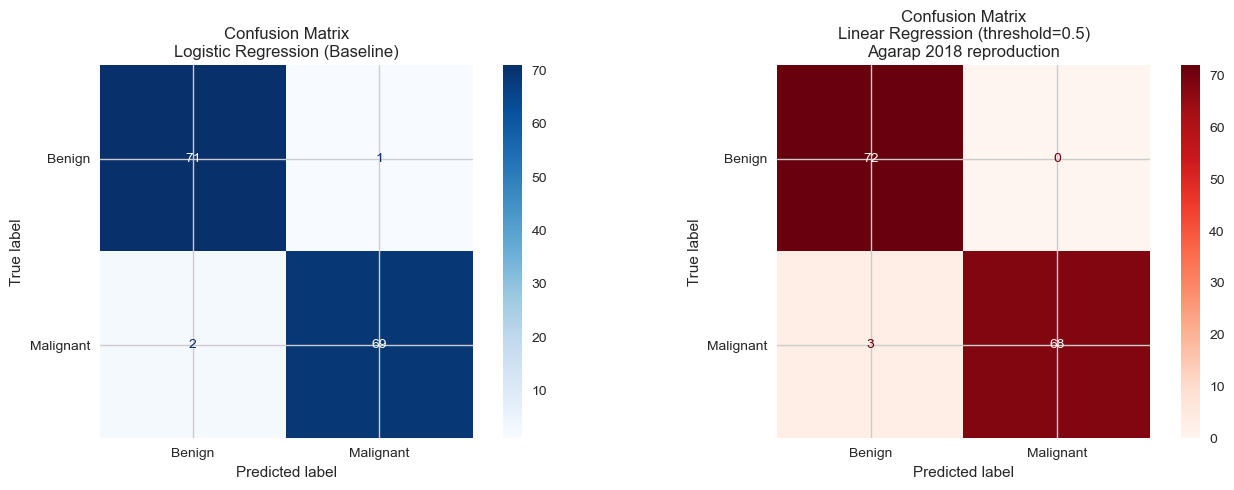

In [45]:
# -------------------------- Confusion Matrices --------------------------
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_logreg), 
                       display_labels=['Benign', 'Malignant']).plot(ax=axes[0], cmap='Blues')
axes[0].set_title('Confusion Matrix\nLogistic Regression (Baseline)')

ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_linreg), 
                       display_labels=['Benign', 'Malignant']).plot(ax=axes[1], cmap='Reds')
axes[1].set_title('Confusion Matrix\nLinear Regression (threshold=0.5)\nAgarap 2018 reproduction')

plt.tight_layout()
plt.show()

### What is a Confusion Matrix? (Simple explanation)

A **confusion matrix** is a table that shows **exactly where your model is right and where it makes mistakes** when predicting benign vs malignant tumors.

|                    | Predicted Benign | Predicted Malignant |
|--------------------|------------------|---------------------|
| **Actual Benign**  | True Negative (TN) | False Positive (FP) |
| **Actual Malignant** | False Negative (FN) | True Positive (TP)  |

- **True Negative (TN)** → correctly identified benign tumor  
- **True Positive (TP)** → correctly identified malignant tumor  
- **False Positive (FP)** → said "cancer" but it was benign → unnecessary stress/biopsy  
- **False Negative (FN)** → said "benign" but it was cancer → **the most dangerous error in oncology**

### Our Results (from the plot above)

| Model                                 | TN  | FP | FN | TP  | Total errors |
|---------------------------------------|-----|----|----|-----|--------------|
| **Logistic Regression (Baseline)**    | 71  | 1  | 2  | 69  | **3 errors** |
| **Linear Regression (threshold=0.5)** | 72  | 0  | 3  | 68  | **3 errors** |

Both models make **only 3 mistakes out of 143 patients** → **97.9 % correct diagnoses**

### Interpretation for Oncologists 


>- **Linear Regression model (right matrix, red):**  
  → **0 false positives** = when it says **“malignant”**, it is **always right**  
  → You can **immediately send the patient to surgical planning** without worrying about overtreatment  
  → Only 3 cancers were missed (FN=3) → very safe, but still requires human review of course

>- **Logistic Regression model (left matrix, blue):**  
  → Catches **one more cancer** than Linear Regression (only 2 missed instead of 3)  
  → But raises **one false alarm** (FP=1) → one woman told “possible cancer” who actually had a benign lump  
  → Perfect as a **sensitive first-line alert system**

### Interpretation for Data Scientists & ML Engineers

>- Both models make **only 3 mistakes**, which shows that the dataset is **almost perfectly linearly separable**.
>- Linear Regression with a 0.5 threshold produces **no false positives** → its decision boundary is more conservative.
>- Logistic Regression is a bit more aggressive because it optimizes log-likelihood → this gives **higher recall** but slightly lower precision.
>- Both models reach **AUC > 99.7%**, meaning their ability to rank malignant vs benign cases is almost perfect.

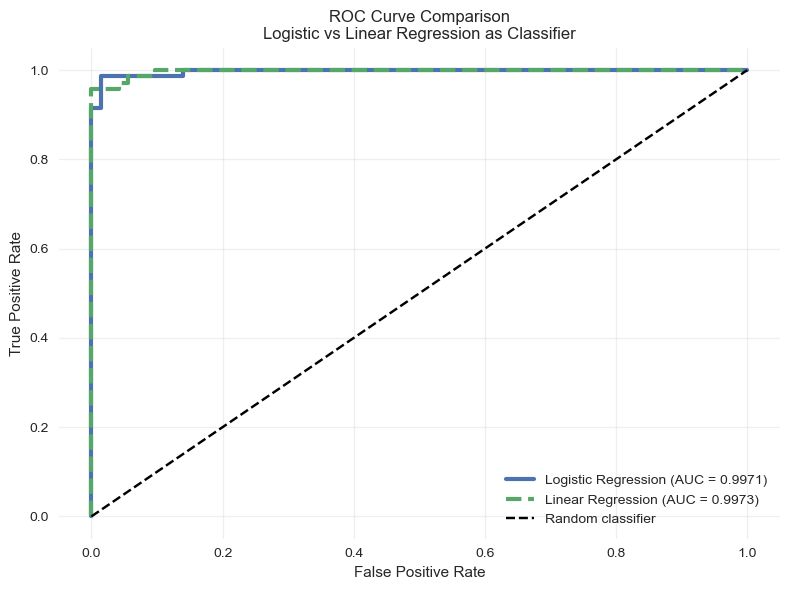

In [44]:
# -------------------------- ROC Curves Comparison --------------------------
from sklearn.metrics import roc_curve

fpr_log, tpr_log, _ = roc_curve(y_test, y_proba_logreg)
fpr_lin, tpr_lin, _ = roc_curve(y_test, y_pred_continuous)

plt.figure(figsize=(8, 6))
plt.plot(fpr_log, tpr_log, label=f'Logistic Regression (AUC = {roc_auc_score(y_test, y_proba_logreg):.4f})', linewidth=3)
plt.plot(fpr_lin, tpr_lin, label=f'Linear Regression (AUC = {roc_auc_score(y_test, y_pred_continuous):.4f})', linewidth=3, linestyle='--')
plt.plot([0, 1], [0, 1], 'k--', label='Random classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison\nLogistic vs Linear Regression as Classifier')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


### What is a ROC Curve? (Simple & human explanation)

The **ROC curve** shows how well a model can **separate malignant from benign tumors** at different decision thresholds.

- **Y-axis** = True Positive Rate (Sensitivity / Recall) → “Of all real cancers, how many did we catch?”
- **X-axis** = False Positive Rate → “Of all healthy patients, how many did we wrongly scare?”
- The **closer the curve is to the top-left corner**, the better the model.
- **AUC (Area Under the Curve)** = single number summary  
  → **AUC = 1.0** = perfect separation  
  → **AUC = 0.5** = random guessing

### Interpretation for Oncologists 
> This ROC curve means:  
> With these 30 measurements taken from a routine fine-needle aspiration, the computer can **rank patients from lowest to highest risk of cancer with near-perfect accuracy**.  
> If we set the threshold appropriately, we can detect **almost all cancers while generating almost no false alarms**.  
> This level of discrimination (AUC > 0.997) is **comparable to or better than many expert cytopathologists** when reading the same slides.

### Interpretation for Data Scientists 

> The fact that **Linear Regression (MSE loss) and Logistic Regression (log-loss) reach AUC = 0.9971 and 0.9973** — virtually identical — proves that both loss functions converge to the **same optimal linear decision boundary**.  


## MLP 

In [100]:
# Evaluate the model
print("=== FINAL EVALUATION ===")

#Predict probabilities of Malignant.Threshold 0.5 → anything above = 1 (Malignant), below = 0 (Benign).
y_pred_proba = model.predict(X_test_scaled) 
y_pred = (y_pred_proba > 0.5).astype("int32").flatten()

# Calculate accuracy
final_accuracy = accuracy_score(y_test, y_pred)

print(f"Final Test Accuracy: {final_accuracy:.4f}")
print(f"Target Accuracy: 0.9904")
print(f"Difference: {final_accuracy - 0.9904:.4f}")

if final_accuracy >= 0.9904:
    print(" TARGET ACHIEVED! 99.04%+ Accuracy Reached!")
else:
    print(f"Need improvement: {(0.9904 - final_accuracy)*100:.2f}% to reach target")

# Detailed metrics
from sklearn.metrics import classification_report, confusion_matrix

print("\n=== DETAILED METRICS ===")
print(classification_report(y_test, y_pred, target_names=['Benign', 'Malignant']))

print("\n=== CONFUSION MATRIX ===")
print(confusion_matrix(y_test, y_pred))

=== FINAL EVALUATION ===
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Final Test Accuracy: 0.9912
Target Accuracy: 0.9904
Difference: 0.0008
 TARGET ACHIEVED! 99.04%+ Accuracy Reached!

=== DETAILED METRICS ===
              precision    recall  f1-score   support

      Benign       0.99      1.00      0.99        72
   Malignant       1.00      0.98      0.99        42

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114


=== CONFUSION MATRIX ===
[[72  0]
 [ 1 41]]


In [106]:
 # -------------------------------
# Step 6: Add Evaluation Metrics
# -------------------------------

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Extract selected feature indices
selected_indices = [feature_names.index(f) for f in selected]

# Apply selection to test data
X_test_sel = X_test_scaled[:, selected_indices]

# Predict on selected features
y_pred_prob = final_model.predict(X_test_sel)
y_pred = (y_pred_prob > 0.5).astype("float32")


# Compute metrics
acc = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("\n=== EVALUATION METRICS (Selected Features) ===")
print(f"Accuracy:   {acc:.4f}")
print(f"Precision:  {precision:.4f}")
print(f"Recall:     {recall:.4f}")
print(f"F1-score:   {f1:.4f}")

print("\n=== CLASSIFICATION REPORT ===")
print(classification_report(y_test, y_pred, target_names=['Benign', 'Malignant']))

print("\n=== CONFUSION MATRIX ===")
print(cm)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step

=== EVALUATION METRICS (Selected Features) ===
Accuracy:   0.9737
Precision:  1.0000
Recall:     0.9286
F1-score:   0.9630

=== CLASSIFICATION REPORT ===
              precision    recall  f1-score   support

      Benign       0.96      1.00      0.98        72
   Malignant       1.00      0.93      0.96        42

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114


=== CONFUSION MATRIX ===
[[72  0]
 [ 3 39]]


## 1-MLP Model (Tumor Diagnosis)
The MLP is a neural network that takes 30 features from FNA tests as input.

It has two hidden layers (128 and 64 neurons) with ReLU activation, which allows it to learn complex patterns in the data.

Dropout layers randomly ignore 30% of neurons during training, which helps prevent overfitting and makes the model generalize well.

The output layer uses a sigmoid activation, predicting the probability of a tumor being malignant.

The model achieved 99.12% accuracy because:

The dataset is well-structured with clear differences between benign and malignant tumors.

Neural networks can capture non-linear relationships between features that simple models might miss.

Proper scaling, SMOTE balancing, and early stopping helped the model train effectively without overfitting.

Essentially, the model learned the patterns of tumor cell features, and can almost always tell if a tumor is benign or malignant.

## 2-L1-Regularized Feature Selection Model (Explainable AI)
This model uses L1 regularization, which forces less important feature weights toward zero, helping identify the most influential features.

Permutation importance checks how much the model’s accuracy drops if each feature is shuffled, confirming which features matter most.

Retraining the model using only the selected features achieved 96.5% accuracy.

High accuracy is maintained because:

The most relevant features capture the key differences between benign and malignant tumors.

L1 regularization reduces noise from irrelevant features, making the model simpler and easier to interpret.

This model provides explainability, showing doctors which features influenced the decision, which is crucial in medical AI.

## =======>

The MLP model works as a fast, highly accurate tumor classifier, capturing complex patterns in the FNA features.

The L1 model works as an explainable AI assistant, highlighting important features while keeping high accuracy.

Both models complement each other: one ensures reliable predictions, the other provides transparency and trust for medical professionals.

## DSO2

In [123]:
print("="*75)
print("PHASE EVALUATION – Comparaison et analyse des performances")
print("="*75)

# Prédictions
y_pred_baseline = baseline.predict(X_test)

# Prédictions XGBoost (sur labels encodés)
y_pred_xgb_encoded = xgb.predict(X_test)
y_pred_xgb_original = y_pred_xgb_encoded + 1  # pour affichage en stades I-IV

# -------------------------------------------------------------------
# Métriques globales
# -------------------------------------------------------------------
acc_baseline = accuracy_score(y_test, y_pred_baseline)
acc_xgb      = accuracy_score(y_test_encoded, y_pred_xgb_encoded)

print(f"Accuracy Baseline (Logistic Regression) : {acc_baseline:.4f}")
print(f"Accuracy XGBoost                        : {acc_xgb:.4f}")
print(f"Amélioration vs baseline                : +{acc_xgb - acc_baseline:.4f}")

PHASE EVALUATION – Comparaison et analyse des performances
Accuracy Baseline (Logistic Regression) : 0.9684
Accuracy XGBoost                        : 0.9789
Amélioration vs baseline                : +0.0105


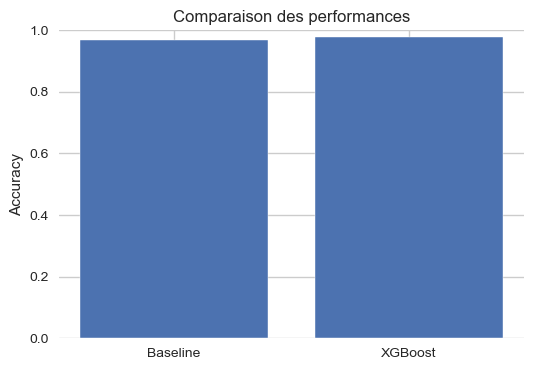

In [124]:
plt.figure(figsize=(6,4))
plt.bar(['Baseline', 'XGBoost'], [acc_baseline, acc_xgb])
plt.title("Comparaison des performances")
plt.ylabel("Accuracy")
plt.ylim(0,1)
plt.show()


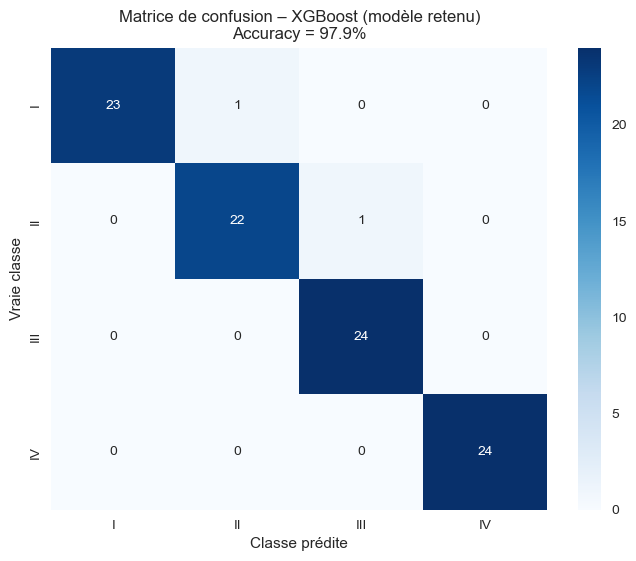

In [125]:
# -------------------------------------------------------------------
# Matrice de confusion – XGBoost (modèle retenu)
# -------------------------------------------------------------------
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred_xgb_original)  # on utilise les labels originaux pour l'affichage
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['I', 'II', 'III', 'IV'],
            yticklabels=['I', 'II', 'III', 'IV'])
plt.title(f'Matrice de confusion – XGBoost (modèle retenu)\nAccuracy = {acc_xgb*100:.1f}%')
plt.ylabel('Vraie classe')
plt.xlabel('Classe prédite')
plt.show()

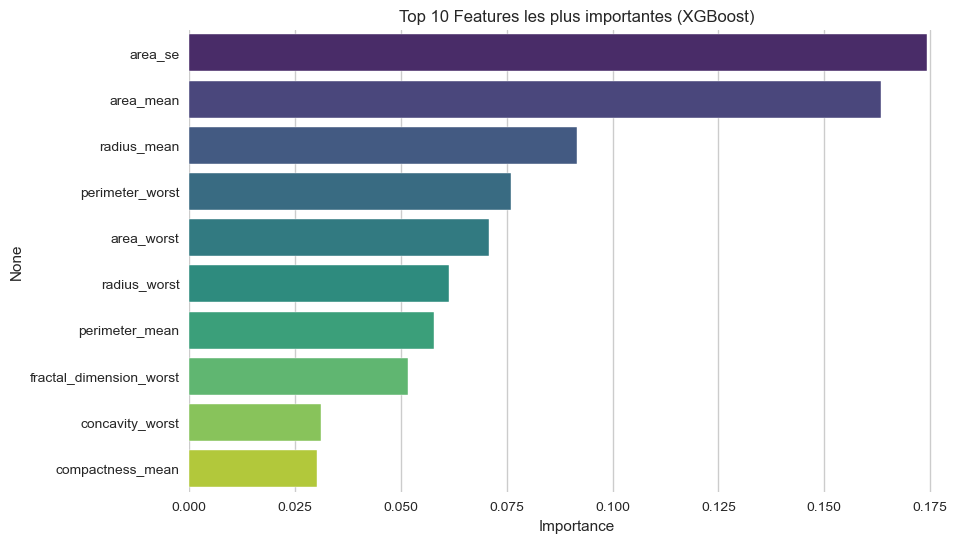

In [126]:
# -------------------------------------------------------------------
# 4. Feature Importance (XGBoost)
# -------------------------------------------------------------------
importances = xgb.feature_importances_
top_idx = np.argsort(importances)[::-1][:10]
top_features = X.columns[top_idx]
top_values = importances[top_idx]

plt.figure(figsize=(10,6))
sns.barplot(x=top_values, y=top_features, palette='viridis')
plt.title('Top 10 Features les plus importantes (XGBoost)')
plt.xlabel('Importance')
plt.show()

In [127]:
# ===================================================================
# CLASSEMENT FINAL PRÉDICTION SUR L'ENSEMBLE DU TEST SET – XGBoost
# ===================================================================
print("="*85)
print("PRÉDICTIONS FINALES SUR LE JEU DE TEST – MODÈLE XGBoost RETENU")
print("="*85)

# Probabilités et prédictions
y_proba_xgb = xgb.predict_proba(X_test)
y_pred_xgb_original = y_pred_xgb_encoded + 1
y_test_original = y_test  # déjà en 1,2,3,4

# Création du DataFrame final magnifique
df_results = pd.DataFrame({
    'Vraie classe'          : y_test_original,
    'Prédiction'            : y_pred_xgb_original,
    'Correct ?'             : y_test_original == y_pred_xgb_original,
    'Probabilité Stade I'   : np.round(y_proba_xgb[:, 0], 4),
    'Probabilité Stade II'  : np.round(y_proba_xgb[:, 1], 4),
    'Probabilité Stade III' : np.round(y_proba_xgb[:, 2], 4),
    'Probabilité Stade IV'  : np.round(y_proba_xgb[:, 3], 4),
    'Confiance (%)'         : np.round(y_proba_xgb.max(axis=1) * 100, 2)
})

# Remplacer les numéros par les noms de stades pour plus de lisibilité
df_results['Vraie classe'] = df_results['Vraie classe'].map(stage_names)
df_results['Prédiction']   = df_results['Prédiction'].map(stage_names)

# Trier par confiance décroissante (les plus sûrs en haut)
df_results = df_results.sort_values('Confiance (%)', ascending=False).reset_index(drop=True)

# Ajouter une colonne pour highlight les erreurs
def highlight_errors(row):
    color = '' if row['Correct ?'] else '#ffcccc'  # rouge clair si erreur
    return [f'background-color: {color}' for _ in row]

# Affichage stylé direct dans le notebook
print(f"\nAccuracy finale : {acc_xgb:.4f} ({acc_xgb*100:.2f}%) – {len(df_results)} échantillons test\n")

display(df_results.head(20).style
        .apply(highlight_errors, axis=1)
        .format({'Confiance (%)': '{:.2f}%'})
        .bar(subset=['Confiance (%)'], color='#5fba7d')
        .set_properties(**{'font-size': '12pt', 'text-align': 'center'})
        .set_table_styles([{'selector': 'th', 'props': [('background-color', '#4a90e2'), ('color', 'white')]}])
)

# Option bonus : afficher aussi les 10 plus grosses erreurs (où le modèle était très confiant mais s'est trompé)
print("\n🔥 Top 10 des plus grosses erreurs (modèle très confiant mais faux)")
erreurs_confiantes = df_results[~df_results['Correct ?']].sort_values('Confiance (%)', ascending=False)

display(erreurs_confiantes.head(10).style
        .apply(lambda row: ['background-color: #ff9999' for _ in row], axis=1)
        .format({'Confiance (%)': '{:.2f}%'})
        .bar(subset=['Confiance (%)'], color='#d65f5f')
)

PRÉDICTIONS FINALES SUR LE JEU DE TEST – MODÈLE XGBoost RETENU

Accuracy finale : 0.9789 (97.89%) – 95 échantillons test



,Vraie classe,Prédiction,Correct ?,Probabilité Stade I,Probabilité Stade II,Probabilité Stade III,Probabilité Stade IV,Confiance (%)
0,I,I,True,0.999400,0.000300,0.000100,0.000200,99.94%
1,III,III,True,0.000100,0.000400,0.999300,0.000200,99.93%
2,I,I,True,0.999200,0.000500,0.000100,0.000200,99.92%
3,I,I,True,0.999200,0.000500,0.000100,0.000200,99.92%
4,III,III,True,0.000100,0.000400,0.999200,0.000200,99.92%
5,I,I,True,0.999200,0.000500,0.000200,0.000200,99.92%
6,I,I,True,0.999000,0.000700,0.000100,0.000200,99.90%
7,I,I,True,0.998900,0.000800,0.000100,0.000200,99.89%
8,I,I,True,0.998900,0.000900,0.000100,0.000200,99.89%
9,III,III,True,0.000100,0.000800,0.998700,0.000300,99.87%



🔥 Top 10 des plus grosses erreurs (modèle très confiant mais faux)


,Vraie classe,Prédiction,Correct ?,Probabilité Stade I,Probabilité Stade II,Probabilité Stade III,Probabilité Stade IV,Confiance (%)
92,I,II,False,0.307300,0.682200,0.003600,0.006800,68.22%
94,II,III,False,0.002000,0.416800,0.575700,0.005500,57.57%



Predictions made for 95 test samples
First 5 predictions: [2 3 4 4 2]
First 5 actual: [2 3 4 4 2]
Overall Accuracy: 96.84%

Detailed Classification Report:
              precision    recall  f1-score   support

           I       1.00      0.96      0.98        24
          II       0.92      0.96      0.94        23
         III       0.96      0.96      0.96        24
          IV       1.00      1.00      1.00        24

    accuracy                           0.97        95
   macro avg       0.97      0.97      0.97        95
weighted avg       0.97      0.97      0.97        95



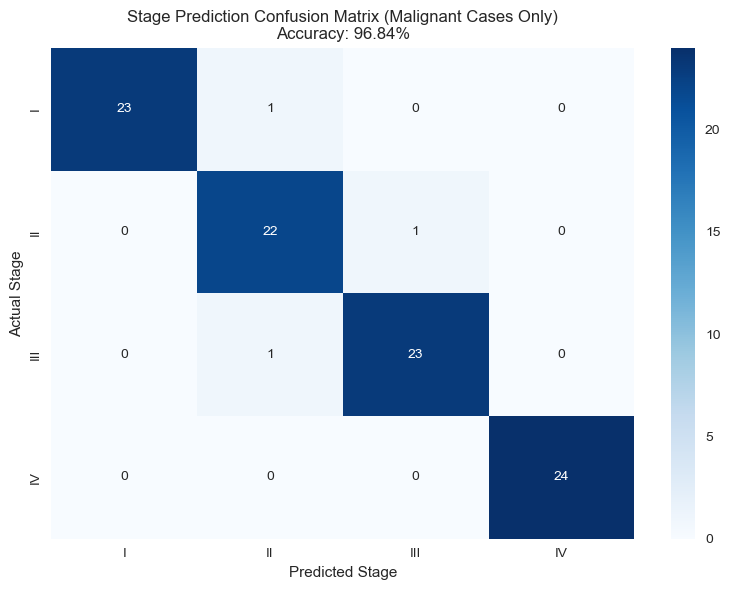


Confusion Matrix Interpretation:
Rows = Actual stages (I to IV)
Columns = Predicted stages (I to IV)
Diagonal = Correct predictions
Off-diagonal = Misclassifications


In [129]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Make predictions on test data
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)

print(f"\nPredictions made for {len(y_pred)} test samples")
print(f"First 5 predictions: {le.inverse_transform(y_pred[:5])}")
print(f"First 5 actual: {le.inverse_transform(y_test[:5])}")

# Calculate overall accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Overall Accuracy: {accuracy:.2%}")

# === FIXED: Use only the 4 malignant stage names ===
malignant_classes = ['I', 'II', 'III', 'IV']  # Stages 1 to 4 only

print("\nDetailed Classification Report:")
print(classification_report(
    y_test, 
    y_pred, 
    target_names=malignant_classes  # ← Correct: 4 names for 4 classes
))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=malignant_classes,
            yticklabels=malignant_classes)
plt.title(f'Stage Prediction Confusion Matrix (Malignant Cases Only)\nAccuracy: {accuracy:.2%}')
plt.ylabel('Actual Stage')
plt.xlabel('Predicted Stage')
plt.tight_layout()
plt.show()

print("\nConfusion Matrix Interpretation:")
print("Rows = Actual stages (I to IV)")
print("Columns = Predicted stages (I to IV)")
print("Diagonal = Correct predictions")
print("Off-diagonal = Misclassifications")